In [393]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [394]:
xlim = (-10, 10)
ylim = (-10, 10)
step = 0.02

np.random.seed(1)
N = 50

c1 = np.random.randn(N,2) + np.array([-1, 0])
c2 = np.random.randn(N,2) + np.array([ 3, 5])

X = np.vstack((c1,c2))
y = np.vstack((-1*np.ones((N,1)), np.ones((N,1))))

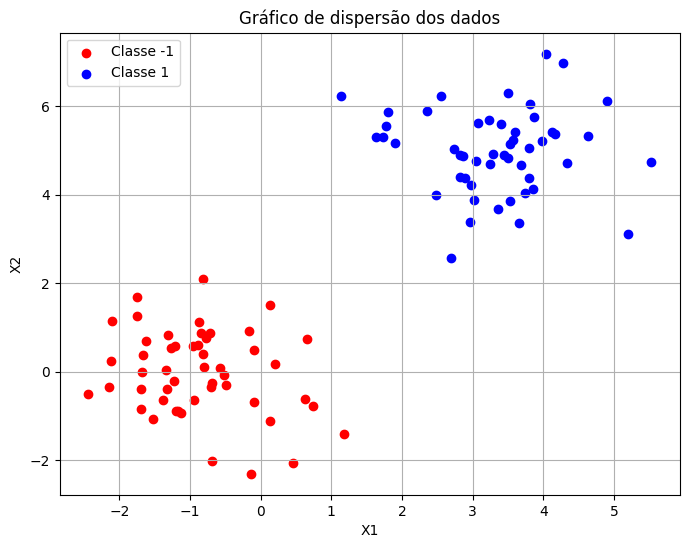

In [395]:
# Plotando os dados
plt.figure(figsize=(8, 6))

plt.scatter(X[y.ravel() == -1, 0], X[y.ravel() == -1, 1], color='red', label='Classe -1')
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='blue', label='Classe 1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfico de dispersão dos dados')
plt.legend()

plt.grid(True)
plt.show()

In [396]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(X, w):
    return np.where(sigmoid(X @ w) >= 0.5, 1, -1)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def cost(X, y, w):
    return -np.mean(y * np.log(sigmoid(X @ w)) + (1 - y) * np.log(1 - sigmoid(X @ w)))

def gradient(X, y, w):
    return X.T @ (sigmoid(X @ w) - y) / y.size

def gradient_descent(X, y, w_init, learning_rate, n_iters):
    w = w_init
    for i in range(n_iters):
        w = w - learning_rate * gradient(X, y, w)
        if (i % 1000 == 0):
            print(f'Cost at iteration {i}', cost(X, y, w))
    return w

def log_loss(y_true, y_proba):
    return -np.mean(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba))

In [397]:
def train(X, y, epochs=100, learning_rate=0.1):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features).T
    weights = weights.reshape(-1, 1)
    bias = 0
    
    # Gradiente descendente
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)
        y_predicted = y_predicted.reshape(-1, 1)
        
        # Calculando os gradientes
        dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / num_samples) * np.sum(y_predicted - y)
        
        # Atualizando os parâmetros
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict(X, w, bias):
    linear_model = np.dot(X, w) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(y_predicted_cls)


In [398]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, w, bias):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, bias)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightgrey', 'lightgreen')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

/tmp/ipykernel_7246/3389780810.py:25: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba))
/tmp/ipykernel_7246/3389780810.py:25: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba))
/home/joaolevi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


nan


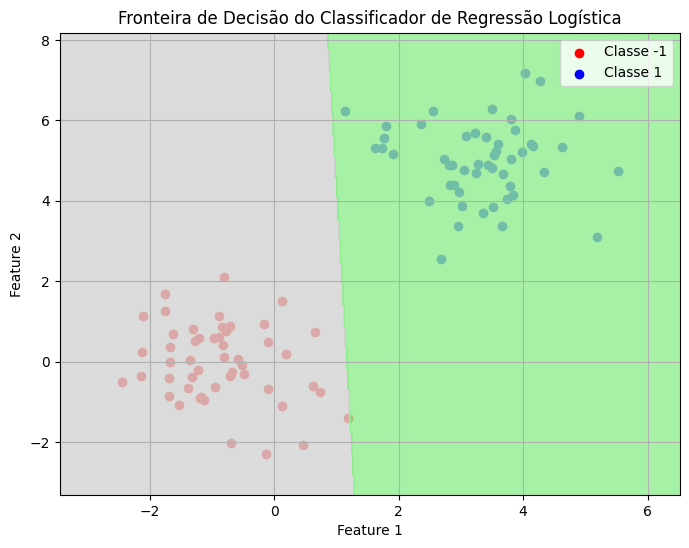

In [399]:
weights, bias = train(X, y, epochs=1000, learning_rate=0.1)

# Plotagem dos dados e da fronteira de decisão
plt.figure(figsize=(8, 6))
plt.scatter(X[y.ravel() == -1, 0], X[y.ravel() == -1, 1], color='red', label='Classe -1')
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='blue', label='Classe 1')
plot_decision_boundary(X, y, weights, bias)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão do Classificador de Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()